In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def merge_trades_quotes(df_trades, df_quotes):
    df_trades = df_trades.rename(columns={
        'side': 'side_T',
        'price': 'price_T',
        'quantity': 'quantity_T'
    })
    df_quotes = df_quotes.rename(columns={
        'exp': 'exp_Q',
        'bid_price': 'bid_price_Q',
        'bid_quantity': 'bid_quantity_Q',
        'ask_price': 'ask_price_Q',
        'ask_quantity': 'ask_quantity_Q'
    })
    df_merged = pd.merge(
        df_trades, 
        df_quotes, 
        on='sysTimestamp', 
        how='outer'
    )
    df_merged.sort_values(by='sysTimestamp', inplace=True)
    df_merged.reset_index(drop=True, inplace=True)
    return df_merged
cryptos = ["BTC", "USDC", "SOL", "RUNE", "PENDLE", "ETH"]
df_final_B = None

for c in cryptos:
    trades_file = f"trades_{c}_Binance.csv"
    quotes_file = f"quotes_{c}_Binance.csv"
    df_trades = pd.read_csv(trades_file)
    df_quotes = pd.read_csv(quotes_file)
    df_merged = merge_trades_quotes(df_trades, df_quotes)
    df_merged["sysTimestamp"] = pd.to_datetime(df_merged["sysTimestamp"])
    df_merged["second"] = df_merged["sysTimestamp"].dt.floor("S")
    df_merged["market_price"] = np.where(
        df_merged["side_T"].isna(),
        (df_merged["bid_price_Q"] + df_merged["ask_price_Q"]) / 2,
        df_merged["price_T"]
    )
    
    df_avg = df_merged.groupby("second").agg({
        "market_price": "last",     
        "bid_price_Q": "last",      
        "ask_price_Q": "last",      
        "bid_quantity_Q": "last",   
        "ask_quantity_Q": "last"    
    }).reset_index()
    df_avg.rename(columns={
        "market_price": f"market_price_BINANCE_{c}",
        "bid_price_Q": f"bid_price_BINANCE_{c}",
        "ask_price_Q": f"ask_price_BINANCE_{c}",
        "bid_quantity_Q": f"bid_quantity_BINANCE_{c}",
        "ask_quantity_Q": f"ask_quantity_BINANCE_{c}"
    }, inplace=True)
    if df_final_B is None:
        df_final_B = df_avg
    else:
        df_final_B = pd.merge(df_final_B, df_avg, on="second", how="outer")
df_final_B.sort_values("second", inplace=True)
df_final_B.reset_index(drop=True, inplace=True)



In [ ]:
df_final_B=df_final_B.iloc[5:]
df_final_B.fillna(method='ffill', inplace=True)
df_final_B

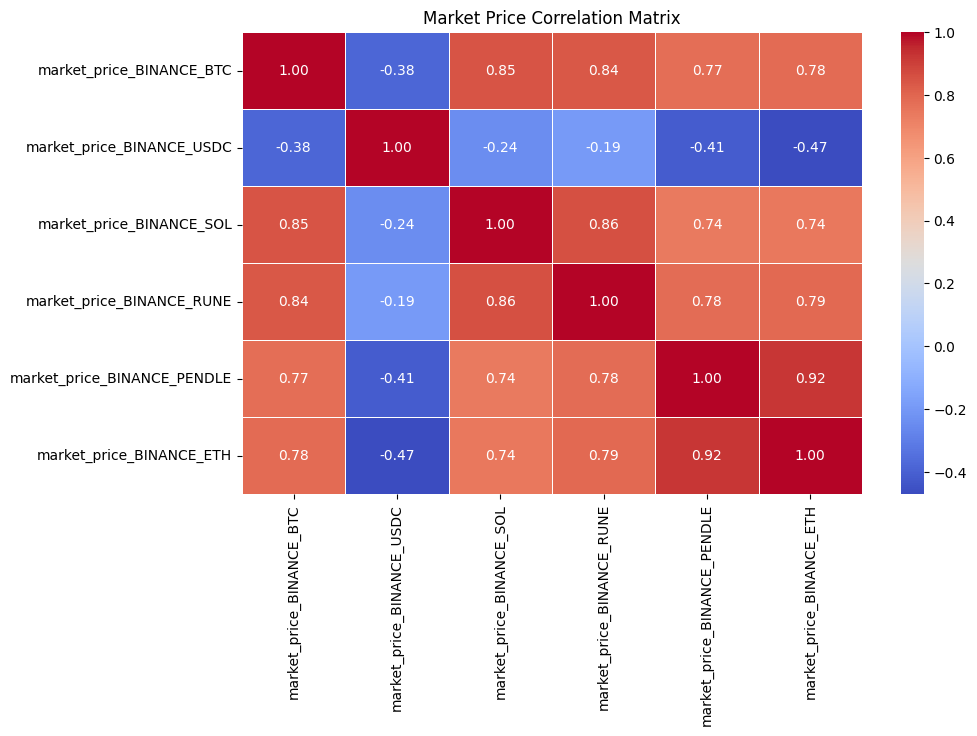

In [10]:
market_price_cols = [col for col in df_final_B.columns if "market_price" in col]
corr_matrix = df_final_B[market_price_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Market Price Correlation Matrix")
plt.show()

In [ ]:
def merge_trades_quotes(df_trades, df_quotes):
    df_trades = df_trades.rename(columns={
        'side': 'side_T',
        'price': 'price_T',
        'quantity': 'quantity_T'
    })
    df_quotes = df_quotes.rename(columns={
        'exp': 'exp_Q',
        'bid_price': 'bid_price_Q',
        'bid_quantity': 'bid_quantity_Q',
        'ask_price': 'ask_price_Q',
        'ask_quantity': 'ask_quantity_Q'
    })
    df_merged = pd.merge(
        df_trades, 
        df_quotes, 
        on='sysTimestamp', 
        how='outer'
    )
    df_merged.sort_values(by='sysTimestamp', inplace=True)
    df_merged.reset_index(drop=True, inplace=True)
    return df_merged
cryptos = ["BTC", "USDC", "SOL", "PENDLE", "ETH"]
df_final_O = None

for c in cryptos:
    trades_file = f"trades_{c}_OKEX.csv"
    quotes_file = f"quotes_{c}_OKEX.csv"
    df_trades = pd.read_csv(trades_file)
    df_quotes = pd.read_csv(quotes_file)
    df_merged = merge_trades_quotes(df_trades, df_quotes)
    df_merged["sysTimestamp"] = pd.to_datetime(df_merged["sysTimestamp"])
    df_merged["second"] = df_merged["sysTimestamp"].dt.floor("S")
    
    df_merged["market_price"] = np.where(
        df_merged["side_T"].isna(),
        (df_merged["bid_price_Q"] + df_merged["ask_price_Q"]) / 2,
        df_merged["price_T"]
    )
    
    df_avg = df_merged.groupby("second").agg({
        "market_price": "last",     
        "bid_price_Q": "last",      
        "ask_price_Q": "last",      
        "bid_quantity_Q": "last",   
        "ask_quantity_Q": "last"    
    }).reset_index()
    df_avg.rename(columns={
        "market_price": f"market_price_OKEX_{c}",
        "bid_price_Q": f"bid_price_OKEX_{c}",
        "ask_price_Q": f"ask_price_OKEX_{c}",
        "bid_quantity_Q": f"bid_quantity_OKEX_{c}",
        "ask_quantity_Q": f"ask_quantity_OKEX_{c}"
    }, inplace=True)
    if df_final_O is None:
        df_final_O = df_avg
    else:
        df_final_O = pd.merge(df_final_O, df_avg, on="second", how="outer")
df_final_O.sort_values("second", inplace=True)
df_final_O.reset_index(drop=True, inplace=True)



In [ ]:
df_final_O=df_final_O.iloc[5:]
df_final_O.fillna(method='ffill', inplace=True)
df_final_O

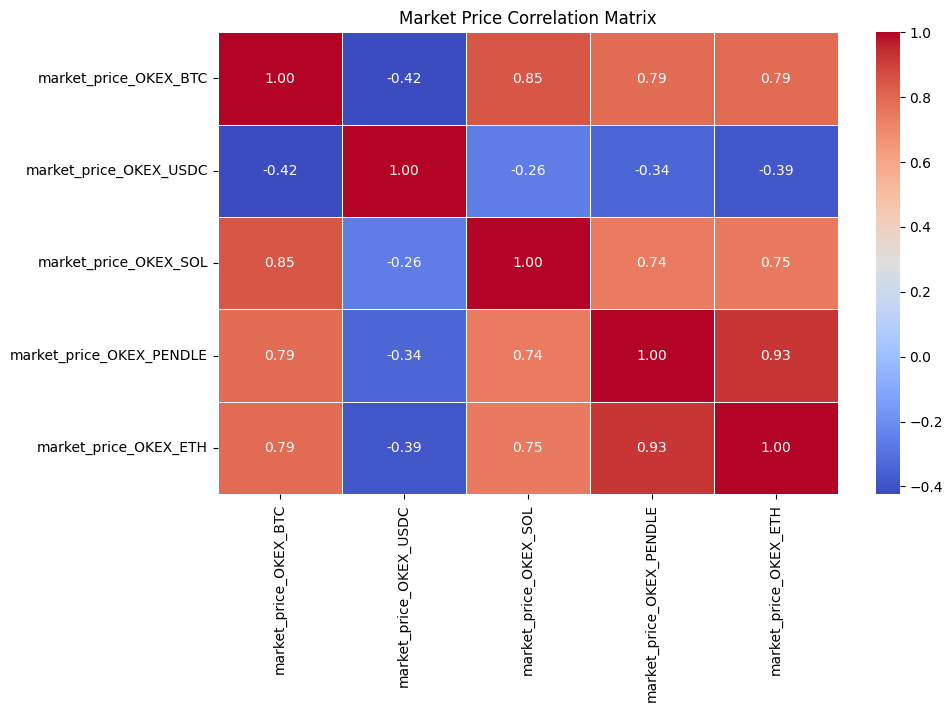

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
market_price_cols = [col for col in df_final_O.columns if "market_price" in col]
corr_matrix = df_final_O[market_price_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Market Price Correlation Matrix")
plt.show()

In [14]:
df_final=pd.merge(df_final_B,df_final_O,on='second',how='outer')
df_final.fillna(method='ffill', inplace=True)
df_final=df_final.iloc[7:]
df_final

C:\Users\choud\AppData\Local\Temp\ipykernel_23160\1700207915.py:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



second  market_price_BINANCE_BTC  bid_price_BINANCE_BTC  \
7     2025-02-22 00:00:12                 9615118.5              9615118.0   
8     2025-02-22 00:00:13                 9615118.5              9615118.0   
9     2025-02-22 00:00:14                 9615118.5              9615118.0   
10    2025-02-22 00:00:15                 9615118.5              9615118.0   
11    2025-02-22 00:00:16                 9615118.5              9615118.0   
...                   ...                       ...                    ...   
86389 2025-02-22 23:59:54                 9655100.5              9655100.0   
86390 2025-02-22 23:59:55                 9655100.5              9655100.0   
86391 2025-02-22 23:59:56                 9655100.5              9655100.0   
86392 2025-02-22 23:59:57                 9655100.0              9655100.0   
86393 2025-02-22 23:59:58                 9655100.0              9655100.0   

       ask_price_BINANCE_BTC  bid_quantity_BINANCE_BTC  \
7                  9615119.0                  422546.0   
8                  9615119.0                  417499.0   
9                  9615119.0                  267983.0   
10                 9615119.0                  205159.0   
11                 9615119.0                  237104.0   
...                      ...                       ...   
86389              9655101.0                  286619.0   
86390              9655101.0                  281383.0   
86391              9655101.0                  233757.0   
86392              9655101.0                  252430.0   
86393              9655101.0                  252430.0   

       ask_quantity_BINANCE_BTC  market_price_BINANCE_USDC  \
7                      114446.0                    10004.5   
8                      290643.0                    10004.0   
9                      509238.0                    10005.0   
10                     447397.0                    10004.0   
11                     516997.0                    10005.0   
...                         ...                        ...   
86389                  400423.0                     9999.0   
86390                  400232.0                     9999.5   
86391                  399757.0                     9999.0   
86392                  399767.0                     9999.0   
86393                  399767.0                     9999.0   

       bid_price_BINANCE_USDC  ask_price_BINANCE_USDC  \
7                     10004.0                 10005.0   
8                     10004.0                 10005.0   
9                     10004.0                 10005.0   
10                    10004.0                 10005.0   
11                    10004.0                 10005.0   
...                       ...                     ...   
86389                  9999.0                 10000.0   
86390                  9999.0                 10000.0   
86391                  9999.0                 10000.0   
86392                  9999.0                 10000.0   
86393                  9999.0                 10000.0   

       bid_quantity_BINANCE_USDC  ...  market_price_OKEX_PENDLE  \
7                     24868735.0  ...                    3388.5   
8                     24867450.0  ...                    3388.0   
9                     24866216.0  ...                    3387.5   
10                    24863278.0  ...                    3387.0   
11                    24861379.0  ...                    3385.5   
...                          ...  ...                       ...   
86389                 24780467.0  ...                    3497.5   
86390                 24780467.0  ...                    3497.5   
86391                 24780461.0  ...                    3497.5   
86392                 24778556.0  ...                    3497.5   
86393                 24768351.0  ...                    3497.5   

       bid_price_OKEX_PENDLE  ask_price_OKEX_PENDLE  bid_quantity_OKEX_PENDLE  \
7                     3387.0                 3390.0                  

In [15]:
for col in df_final.columns:
    if 'BINANCE_BTC' in col and 'price' in col:
        df_final[col] = df_final[col] / 10

In [16]:
df_final

second  market_price_BINANCE_BTC  bid_price_BINANCE_BTC  \
7     2025-02-22 00:00:12                 961511.85               961511.8   
8     2025-02-22 00:00:13                 961511.85               961511.8   
9     2025-02-22 00:00:14                 961511.85               961511.8   
10    2025-02-22 00:00:15                 961511.85               961511.8   
11    2025-02-22 00:00:16                 961511.85               961511.8   
...                   ...                       ...                    ...   
86389 2025-02-22 23:59:54                 965510.05               965510.0   
86390 2025-02-22 23:59:55                 965510.05               965510.0   
86391 2025-02-22 23:59:56                 965510.05               965510.0   
86392 2025-02-22 23:59:57                 965510.00               965510.0   
86393 2025-02-22 23:59:58                 965510.00               965510.0   

       ask_price_BINANCE_BTC  bid_quantity_BINANCE_BTC  \
7                   961511.9                  422546.0   
8                   961511.9                  417499.0   
9                   961511.9                  267983.0   
10                  961511.9                  205159.0   
11                  961511.9                  237104.0   
...                      ...                       ...   
86389               965510.1                  286619.0   
86390               965510.1                  281383.0   
86391               965510.1                  233757.0   
86392               965510.1                  252430.0   
86393               965510.1                  252430.0   

       ask_quantity_BINANCE_BTC  market_price_BINANCE_USDC  \
7                      114446.0                    10004.5   
8                      290643.0                    10004.0   
9                      509238.0                    10005.0   
10                     447397.0                    10004.0   
11                     516997.0                    10005.0   
...                         ...                        ...   
86389                  400423.0                     9999.0   
86390                  400232.0                     9999.5   
86391                  399757.0                     9999.0   
86392                  399767.0                     9999.0   
86393                  399767.0                     9999.0   

       bid_price_BINANCE_USDC  ask_price_BINANCE_USDC  \
7                     10004.0                 10005.0   
8                     10004.0                 10005.0   
9                     10004.0                 10005.0   
10                    10004.0                 10005.0   
11                    10004.0                 10005.0   
...                       ...                     ...   
86389                  9999.0                 10000.0   
86390                  9999.0                 10000.0   
86391                  9999.0                 10000.0   
86392                  9999.0                 10000.0   
86393                  9999.0                 10000.0   

       bid_quantity_BINANCE_USDC  ...  market_price_OKEX_PENDLE  \
7                     24868735.0  ...                    3388.5   
8                     24867450.0  ...                    3388.0   
9                     24866216.0  ...                    3387.5   
10                    24863278.0  ...                    3387.0   
11                    24861379.0  ...                    3385.5   
...                          ...  ...                       ...   
86389                 24780467.0  ...                    3497.5   
86390                 24780467.0  ...                    3497.5   
86391                 24780461.0  ...                    3497.5   
86392                 24778556.0  ...                    3497.5   
86393                 24768351.0  ...                    3497.5   

       bid_price_OKEX_PENDLE  ask_price_OKEX_PENDLE  bid_quantity_OKEX_PENDLE  \
7                     3387.0                 3390.0                  

In [36]:
def run_strategy(df_final,
                 arb_threshold=0.0002,      
                 trade_percent=0.1,         
                 max_position_duration=3000,  
                 starting_cash=1e10,         
                 do_arbitrage=True,         
                 do_pairs=True             
                ):
    df = df_final.copy()
    
    portfolio = {
        'BTC': 0.0, 'ETH': 0.0, 'SOL': 0.0, 'PENDLE': 0.0,
        'short_BTC': 0.0, 'short_ETH': 0.0, 'short_SOL': 0.0, 'short_PENDLE': 0.0,
        'cash': starting_cash
    }
    portfolio_values = []
    trade_log = []
    open_positions = []
    def calculate_position_size(row, crypto, direction, exchange):
        if direction == 'long':
            price = row[f'ask_price_{exchange}_{crypto}']
            available_qty = row[f'ask_quantity_{exchange}_{crypto}']
        else:
            price = row[f'bid_price_{exchange}_{crypto}']
            available_qty = row[f'bid_quantity_{exchange}_{crypto}']
        
        allocated_cash = portfolio['cash'] * trade_percent
        max_quantity = allocated_cash // price
        available_qty_int = int(available_qty)
        
        return int(min(max_quantity, available_qty_int))

    def execute_arbitrage(row):
        for crypto in ['BTC', 'ETH', 'SOL', 'PENDLE']:
            binance_market = row[f'market_price_BINANCE_{crypto}']
            okex_market = row[f'market_price_OKEX_{crypto}']
            if abs(binance_market - okex_market) > binance_market * arb_threshold:
                if binance_market < okex_market:
                    buy_exchange, sell_exchange = 'BINANCE', 'OKEX'
                else:
                    buy_exchange, sell_exchange = 'OKEX', 'BINANCE'
                buy_price = row[f'ask_price_{buy_exchange}_{crypto}']
                sell_price = row[f'bid_price_{sell_exchange}_{crypto}']
                buy_qty = calculate_position_size(row, crypto, 'long', buy_exchange)
                sell_qty = row[f'bid_quantity_{sell_exchange}_{crypto}']
                qty = min(buy_qty, sell_qty)
                if qty > 0:
                    portfolio['cash'] -= qty * buy_price
                    portfolio['cash'] += qty * sell_price
                    trade_log.append({'time': row['second'], 'type': 'arbitrage', 'crypto': crypto, 'qty': qty, 'profit': qty * (sell_price - buy_price), 'buy_exchange': buy_exchange, 'sell_exchange': sell_exchange})

    def pairs_trading(row, step_index, exchange):
        for position in open_positions.copy():
            if (step_index - position['entry_time']) > max_position_duration or \
               (position['direction'] == 'long' and row[f'bid_price_{exchange}_{position["crypto"]}'] <= position['entry_price'] * 0.95) or \
               (position['direction'] == 'short' and row[f'ask_price_{exchange}_{position["crypto"]}'] >= position['entry_price'] * 1.05):
                close_position(position['crypto'], position['direction'], row, exchange)
        btc_price = row[f'market_price_{exchange}_BTC']
        eth_price = row[f'market_price_{exchange}_ETH']
        baseline = (btc_price + eth_price) / 2
        for crypto in ['SOL', 'PENDLE','BTC','ETH']:
            crypto_price = row[f'market_price_{exchange}_{crypto}']
            spread = crypto_price - baseline
            upper_threshold = baseline * 0.005
            lower_threshold = -baseline * 0.005
            if len(open_positions) >= 5:
                break
            if spread > upper_threshold:
                qty = calculate_position_size(row, crypto, 'short', exchange)
                if qty > 0:
                    bid_price = row[f'bid_price_{exchange}_{crypto}']
                    portfolio['cash'] += qty * bid_price
                    portfolio[f'short_{crypto}'] += qty
                    open_positions.append({'crypto': crypto, 'direction': 'short', 'qty': qty, 'entry_price': bid_price, 'entry_time': step_index})
            elif spread < lower_threshold:
                qty = calculate_position_size(row, crypto, 'long', exchange)
                if qty > 0:
                    ask_price = row[f'ask_price_{exchange}_{crypto}']
                    portfolio['cash'] -= qty * ask_price
                    portfolio[crypto] += qty
                    open_positions.append({'crypto': crypto, 'direction': 'long', 'qty': qty, 'entry_price': ask_price, 'entry_time': step_index})

    def close_position(crypto, direction, row, exchange):
        position = next((p for p in open_positions if p['crypto'] == crypto and p['direction'] == direction), None)
        if position:
            qty = position['qty']
            if direction == 'long':
                close_price = row[f'bid_price_{exchange}_{crypto}']
                portfolio['cash'] += qty * close_price
                portfolio[crypto] -= qty
                profit = (close_price - position['entry_price']) * qty
            else:
                close_price = row[f'ask_price_{exchange}_{crypto}']
                portfolio['cash'] -= qty * close_price
                portfolio[f'short_{crypto}'] -= qty
                profit = (position['entry_price'] - close_price) * qty
            trade_log.append({'time': row['second'], 'type': 'pairs_close', 'crypto': crypto, 'qty': qty, 'profit': profit})
            open_positions.remove(position)
    
    for i, row in df.iterrows():
        if do_arbitrage:
            execute_arbitrage(row)
        if do_pairs:
            pairs_trading(row, i, 'BINANCE')
            pairs_trading(row, i, 'OKEX')
        total_value = portfolio['cash']
        for crypto in ['BTC', 'ETH', 'SOL', 'PENDLE']:
            best_bid = max(row[f'bid_price_BINANCE_{crypto}'], row[f'bid_price_OKEX_{crypto}'])
            worst_ask = min(row[f'ask_price_BINANCE_{crypto}'], row[f'ask_price_OKEX_{crypto}'])
            total_value += portfolio[crypto] * best_bid
            total_value -= portfolio[f'short_{crypto}'] * worst_ask
        portfolio_values.append(total_value)
    
    returns = np.diff(portfolio_values) / portfolio_values[:-1]
    sharpe_ratio = np.mean(returns) / np.std(returns) * np.sqrt(252) if np.std(returns) > 0 else 0
    won_trades = sum(1 for t in trade_log if t['profit'] > 0)
    lost_trades = sum(1 for t in trade_log if t['profit'] < 0)
    total_profit = sum(t['profit'] for t in trade_log if t['profit'] > 0)
    total_loss = sum(t['profit'] for t in trade_log if t['profit'] < 0)
    net_profit = total_profit + total_loss
    
    final_portfolio_value = portfolio_values[-1]
    return portfolio_values, trade_log, final_portfolio_value, sharpe_ratio, won_trades, lost_trades, net_profit


In [37]:
portfolio_values, trade_log, final_portfolio_value, sharpe_ratio, won_trades, lost_trades, net_profit = run_strategy(df_final)
print(f"Final Portfolio Value: {final_portfolio_value:,.2f}")
print(f"Total Return: {((final_portfolio_value / portfolio_values[0]) - 1) * 100:.2f}%")
print(f"Max Drawdown: {((max(pd.Series(portfolio_values).cummax()) - min(portfolio_values)) / max(pd.Series(portfolio_values).cummax())) * 100:.2f}%")
print(f"Total Trades: {len(trade_log)}")
print(f"Winning Trades: {sum(1 for trade in trade_log if trade['profit'] > 0)}")
print(f"Losing Trades: {sum(1 for trade in trade_log if trade['profit'] < 0)}")
print(f"Total Profit: {sum(trade['profit'] for trade in trade_log if trade['profit'] > 0):,.2f}")
print(f"Total Loss: {sum(trade['profit'] for trade in trade_log if trade['profit'] < 0):,.2f}")
print(f"Net Profit: {sum(trade['profit'] for trade in trade_log):,.2f}")

returns = pd.Series(portfolio_values).pct_change().dropna()
sharpe_ratio = returns.mean() / returns.std() * (252 ** 0.5) if not returns.empty else 0
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Final Portfolio Value: 11,941,059,612.30
Total Return: 19.41%
Max Drawdown: 16.36%
Total Trades: 65556
Winning Trades: 20440
Losing Trades: 25442
Total Profit: 2,184,768,769.40
Total Loss: -238,930,918.10
Net Profit: 1,945,837,851.30
Sharpe Ratio: 1.69


In [ ]:
%pip install plotly

In [ ]:
%pip install nbformat

In [39]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final['second'], y=portfolio_values, mode='lines', name='Portfolio Value'))
fig.update_layout(title='Portfolio Value Over Time', xaxis_title='Time', yaxis_title='Portfolio Value')
fig.show()